In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Generate Dataset

In [3]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([  4.11289088e-01,   3.08202884e-01,  -8.84841050e-01,
         7.57063107e-01,   3.69993592e-01,   3.31206164e-01,
        -4.73989451e-01,  -5.86125400e-01,  -1.25374310e-04,
        -6.08179060e-01])

In [4]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.14544412,  0.94265077,  0.59000606, -0.31839256,  0.44037992,
        0.24633637,  0.91273137, -0.51726197, -0.81442574,  0.67402326])

In [6]:
y = (x1 * 0.3) + (x2 * 0.5) + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.05)
y = 0.0 <= y

print(y.shape)
y[0:10]

(100,)


array([ True,  True,  True,  True,  True,  True,  True, False, False,  True], dtype=bool)

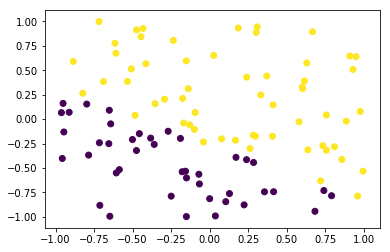

In [9]:
plt.scatter(x1, x2, c=y)

# Gradient Descent

In [10]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(9))

0.000123394575986
0.5
0.999876605424


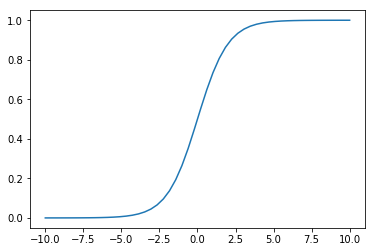

In [13]:
xx = np.linspace(start=-10.0, stop=10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [42]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = (x1 * w1) + (x2 * w2) + b
    y_predict = sigmoid(y_predict)
    
    predict = (0.5 <= y_predict)
    actual = y
    
    error = (predict != actual).mean()
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
    
print("------------------------")
print("{0:2} error = {1:.5f}, w1 = {2:.5f}, w2 = {3:.5f}, b = {4:.5f}".format(epoch, error, w1, w2, b))

 0 error = 0.10000
10 error = 0.02000
20 error = 0.03000
30 error = 0.03000
40 error = 0.03000
50 error = 0.03000
60 error = 0.03000
70 error = 0.03000
80 error = 0.03000
90 error = 0.03000
------------------------
99 error = 0.03000, w1 = 3.10795, w2 = 5.00182, b = 1.19294


In [43]:
import pandas as pd

In [46]:
pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict, '맞춤?': (y == predict)}).head()

,x1,x2,y(actual),y(predict),맞춤?
0,0.411289,0.145444,True,True,True
1,0.308203,0.942651,True,True,True
2,-0.884841,0.590006,True,True,True
3,0.757063,-0.318393,True,True,True
4,0.369994,0.440380,True,True,True


In [48]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

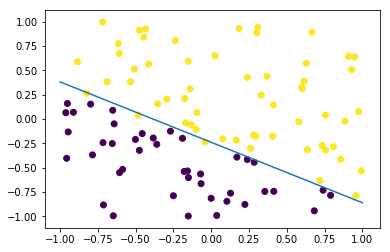

In [49]:
plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)